## Pronoun Resolution Section



In [1]:
import pandas as pd
import string
import csv
from io import StringIO
from nltk.corpus import wordnet

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


import spacy
import pandas as pd
import numpy as np
import nltk
import re
 #import openpyxl
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim.parsing.preprocessing import STOPWORDS as SW
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
import glob

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/apple/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/apple/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/apple/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#Import gap-devleopment.tsv
#Import gap-test.tsv

#Make inferences on the validation dataset

In [2]:
df = pd.read_csv('gap-development.tsv',sep='\t')

In [3]:
df.head()

,ID,Text,Pronoun,Pronoun-offset,A,A-offset,A-coref,B,B-offset,B-coref,URL
0,development-1,Zoe Telford -- played the police officer girlf...,her,274,Cheryl Cassidy,191,True,Pauline,207,False,http://en.wikipedia.org/wiki/List_of_Teachers_...
1,development-2,"He grew up in Evanston, Illinois the second ol...",His,284,MacKenzie,228,True,Bernard Leach,251,False,http://en.wikipedia.org/wiki/Warren_MacKenzie
2,development-3,"He had been reelected to Congress, but resigne...",his,265,Angeloz,173,False,De la Sota,246,True,http://en.wikipedia.org/wiki/Jos%C3%A9_Manuel_...
3,development-4,The current members of Crime have also perform...,his,321,Hell,174,False,Henry Rosenthal,336,True,http://en.wikipedia.org/wiki/Crime_(band)
4,development-5,Her Santa Fe Opera debut in 2005 was as Nuria ...,She,437,Kitty Oppenheimer,219,False,Rivera,294,True,http://en.wikipedia.org/wiki/Jessica_Rivera


In [4]:
#Frequencies for Pronoun Column
df.Pronoun.value_counts()

Pronoun
her    534
his    496
she    249
he     235
She    179
He     138
him     98
Her     38
His     33
Name: count, dtype: int64

In [5]:
#her == Her
#his = Him
#she == She
#he == He

df.Pronoun.str.lower().value_counts()

Pronoun
her    572
his    529
she    428
he     373
him     98
Name: count, dtype: int64

In [6]:
#Normalize pronouns
df.Pronoun = df.Pronoun.str.lower()
df.Pronoun.value_counts()

Pronoun
her    572
his    529
she    428
he     373
him     98
Name: count, dtype: int64

In [7]:
pronoun = {"her":0,
           "his":1,
           "she": 0,
           "he":1,
           "him":1}

#0 - Female Biased
#1 - Male Biased

In [8]:
#New column - "Gender Bias"
df['Gender_Bias'] = df['Pronoun'].map(pronoun)

In [9]:
#Break down of labels
df.Gender_Bias.value_counts()

Gender_Bias
0    1000
1    1000
Name: count, dtype: int64

In [10]:
X_train = df[['Text','Gender_Bias']]

In [11]:
X_train.head()

,Text,Gender_Bias
0,Zoe Telford -- played the police officer girlf...,0
1,"He grew up in Evanston, Illinois the second ol...",1
2,"He had been reelected to Congress, but resigne...",1
3,The current members of Crime have also perform...,1
4,Her Santa Fe Opera debut in 2005 was as Nuria ...,0


In [12]:
X_train.Gender_Bias.dtype

dtype('int64')

# Test Creation

In [13]:
df_test = pd.read_csv('gap-test.tsv',sep='\t')

In [14]:
df_test.head()

,ID,Text,Pronoun,Pronoun-offset,A,A-offset,A-coref,B,B-offset,B-coref,URL
0,test-1,Upon their acceptance into the Kontinental Hoc...,His,383,Bob Suter,352,False,Dehner,366,True,http://en.wikipedia.org/wiki/Jeremy_Dehner
1,test-2,"Between the years 1979-1981, River won four lo...",him,430,Alonso,353,True,Alfredo Di St*fano,390,False,http://en.wikipedia.org/wiki/Norberto_Alonso
2,test-3,Though his emigration from the country has aff...,He,312,Ali Aladhadh,256,True,Saddam,295,False,http://en.wikipedia.org/wiki/Aladhadh
3,test-4,"At the trial, Pisciotta said: ``Those who have...",his,526,Alliata,377,False,Pisciotta,536,True,http://en.wikipedia.org/wiki/Gaspare_Pisciotta
4,test-5,It is about a pair of United States Navy shore...,his,406,Eddie,421,True,Rock Reilly,559,False,http://en.wikipedia.org/wiki/Chasers


In [15]:
df_test.Pronoun = df_test.Pronoun.str.lower()

In [16]:
df_test['Gender_Bias'] = df_test['Pronoun'].map(pronoun)

In [17]:
X_test = df_test[['Text','Gender_Bias']]

In [18]:
X_test.Gender_Bias.dtype

dtype('float64')

In [19]:
class dataprocessor:
    def __init__(self):
        pass  # 'return' is not needed here, as __init__ should return None

    @staticmethod
    def get_wordnet_pos(word: str) -> str:
        """Map POS tag to first character lemmatize() accepts
        Inputs:
        word(str): A single word

        Returns:
        str: A POS tag compatible with the lemmatizer
        """
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}

        return tag_dict.get(tag, wordnet.NOUN)

    @staticmethod
    def preprocess(text: str) -> str:
        """A function that preprocesses text through the
        steps of Natural Language Processing (NLP).
        Inputs:
        text(str): A string of text

        Returns:
        text(str): A processed string of text
        """
        # Lowercase
        text = text.lower()

        # Punctuation removal
        text = "".join([char for char in text if char not in string.punctuation])

        # Tokenization
        tokens = text.split()

        # Digit removal (Only for ALL numeric numbers)
        tokens = [token for token in tokens if not token.isnumeric()]

        # Stopword removal
        stopwords = nltk.corpus.stopwords.words('english')
        custom_stopwords = ['\n', '\n\n', '&', ' ', '.', '-', '$', '@']
        stopwords.extend(custom_stopwords)

        tokens = [token for token in tokens if token not in stopwords]

        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token, dataprocessor.get_wordnet_pos(token)) for token in tokens]

        # Rejoin tokens into a single string and remove extra spaces
        text = ' '.join(tokens)
        text = re.sub(' +', ' ', text)

        return text

In [20]:
dataprocessor.preprocess(X_train.Text[0])

'zoe telford played police officer girlfriend simon maggie dumped simon final episode series slept jenny see phoebe thomas played cheryl cassidy paulines friend also year pupil simon class dumped boyfriend follow simon advice wouldnt sex later realise due catch crab friend pauline'

In [21]:
X_train_text = X_train.Text.apply(dataprocessor.preprocess)
X_train_text.head()

0    zoe telford played police officer girlfriend s...
1    grow evanston illinois second old five child i...
2    reelect congress resign accept post ambassador...
3    current member crime also perform san francisc...
4    santa fe opera debut nuria revise edition goli...
Name: Text, dtype: object

In [22]:
X_test_text = X_test.Text.apply(dataprocessor.preprocess)

In [23]:
#Labels
y_train = X_train.Gender_Bias
y_test = X_test.Gender_Bias

In [24]:
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(X_train_text)
X_test = tfidf_vectorizer.transform(X_test_text)

In [25]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [26]:
pred = model.predict(X_test)

In [27]:
# Evaluate the model
y_Test = y_test.values
def calculate_accuracy(y_true, y_pred):
    """
    Calculate accuracy between y_true and y_pred.

    Parameters:
    y_true (list or numpy array): True labels.
    y_pred (list or numpy array): Predicted labels.

    Returns:
    float: Accuracy as a fraction (0.0 to 1.0).
    """
    if len(y_true) != len(y_pred):
        raise ValueError("Input arrays y_true and y_pred must have the same length.")

    correct_predictions = 0
    total_predictions = len(y_true)

    for true, pred in zip(y_true, y_pred):
        if true == pred:
            correct_predictions += 1

    accuracy = correct_predictions / total_predictions
    return accuracy*100


calculate_accuracy(y_test,pred)


77.85

In [28]:
# Assuming y_test and pred are numpy arrays
mask = ~np.isnan(y_test)
y_test = y_test[mask]
pred = pred[mask]

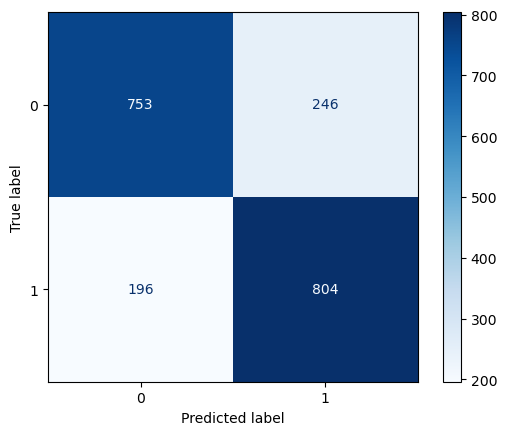

In [29]:
# After handling NaN values, recompute the confusion matrix
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()